<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Questions" data-toc-modified-id="Questions-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Questions</a></span><ul class="toc-item"><li><span><a href="#Choice-of-Data" data-toc-modified-id="Choice-of-Data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Choice of Data</a></span></li></ul></li><li><span><a href="#Work" data-toc-modified-id="Work-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Work</a></span><ul class="toc-item"><li><span><a href="#&quot;Global&quot;-Imports" data-toc-modified-id="&quot;Global&quot;-Imports-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>"Global" Imports</a></span></li><li><span><a href="#Read-data" data-toc-modified-id="Read-data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Read data</a></span></li><li><span><a href="#Plot-at-least-one-aspect-to-understand-data" data-toc-modified-id="Plot-at-least-one-aspect-to-understand-data-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Plot at least one aspect to understand data</a></span></li><li><span><a href="#Summarize-data-in-one-sentence" data-toc-modified-id="Summarize-data-in-one-sentence-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Summarize data in one sentence</a></span></li><li><span><a href="#Split-data-into-train-and-test-where-test-size-=-.3" data-toc-modified-id="Split-data-into-train-and-test-where-test-size-=-.3-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Split data into train and test where test size = .3</a></span></li></ul></li><li><span><a href="#Model-1" data-toc-modified-id="Model-1-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Model 1</a></span><ul class="toc-item"><li><span><a href="#Train-data-in-sklearn-model-on-train-data" data-toc-modified-id="Train-data-in-sklearn-model-on-train-data-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Train data in sklearn model on train data</a></span></li><li><span><a href="#Analyze-residuals" data-toc-modified-id="Analyze-residuals-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Analyze residuals</a></span></li></ul></li><li><span><a href="#Model-2" data-toc-modified-id="Model-2-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Model 2</a></span><ul class="toc-item"><li><span><a href="#Train-on-another-model-with-feature-selection" data-toc-modified-id="Train-on-another-model-with-feature-selection-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Train on another model with feature selection</a></span></li><li><span><a href="#Analyze-Residuals" data-toc-modified-id="Analyze-Residuals-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Analyze Residuals</a></span></li></ul></li><li><span><a href="#Reflection" data-toc-modified-id="Reflection-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Reflection</a></span></li><li><span><a href="#References" data-toc-modified-id="References-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>References</a></span></li></ul></div>

# Sharing the News, a Machine Learning Project

## Questions

### Choice of Data

Let's take a look at the [Online News Popularity](https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity) dataset provided by University of California Irvine.  According to the source, this data is a collection of data collected by [Mashable](https://mashable.com/) containing information about articles collected over a two year period.

I chose this data because I wanted to explore how and why news of any kind is shared as well as what different aspects of an article lead it to be shared.  We live in a world of advancing technology.  A larger question would be to ask why news was shared, but I do not believe that can be answered, at least not in this data. 

***

## Work

### "Global" Imports

First, we will import our "global" packages.  These packages will be needed throughout our code so instead of putting them in random places, I decided to load them first.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Read data

Next we will read our data.  The `.csv` that we will use is in a `.zip` folder that we can either download from the source or read with other packages.  In this case, it takes less code and is easier to explain if we download the `.zip` folder and extract the `.csv` file into the folder where the notebook is located.  We can then load the data into a dataframe using `data_frame = pd.read_csv("[filename.csv]")` where `[filename.csv]` is the name of the file.

In [2]:
news_df = pd.read_csv("OnlineNewsPopularity.csv")

Before we do any analysis on the data, lets first take a look at the data by viewing the top 5 rows, to get a glimpse of the information portrayed in this dataset.

We can do this by using the `data_frame.head()` method.

In [3]:
news_df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


Looking at the source, it defines `url` and `timedelta` as 'non-predictive' variables, so we can drop them from the data set.

In [4]:
news_df.drop(columns =["url", " timedelta"], inplace=True)

Next we can check to see if there are any nulls in our data that need to be taken care of.

In [5]:
news_df.isna().sum()

 n_tokens_title                   0
 n_tokens_content                 0
 n_unique_tokens                  0
 n_non_stop_words                 0
 n_non_stop_unique_tokens         0
 num_hrefs                        0
 num_self_hrefs                   0
 num_imgs                         0
 num_videos                       0
 average_token_length             0
 num_keywords                     0
 data_channel_is_lifestyle        0
 data_channel_is_entertainment    0
 data_channel_is_bus              0
 data_channel_is_socmed           0
 data_channel_is_tech             0
 data_channel_is_world            0
 kw_min_min                       0
 kw_max_min                       0
 kw_avg_min                       0
 kw_min_max                       0
 kw_max_max                       0
 kw_avg_max                       0
 kw_min_avg                       0
 kw_max_avg                       0
 kw_avg_avg                       0
 self_reference_min_shares        0
 self_reference_max_shares  

There do not seem to be any nulls in our data so we can move on.

### Plot at least one aspect to understand data

Before we start building our models, first, let's see if there is a relationship between the number of times an article was shared based on the number of time an article was referenced in other shared articles.

<Axes: xlabel=' self_reference_avg_sharess', ylabel=' shares'>

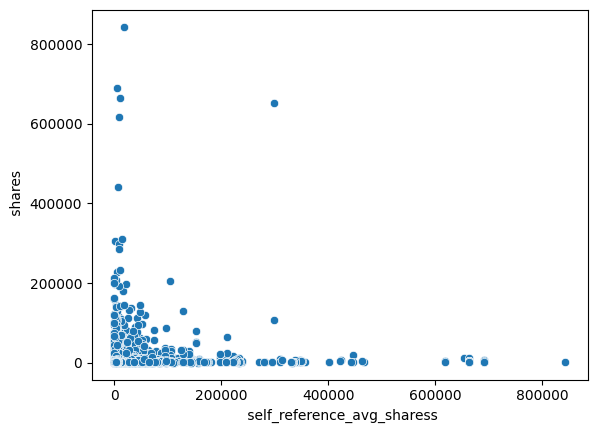

In [6]:
sns.scatterplot(x=news_df[" self_reference_avg_sharess"], y = news_df[" shares"])

These columns seem to contain similar data.

Next, let's see how certain features effect the number of shares, like number of words in the title, number of words in the content, number of images, and the number of links in an article.

<Axes: xlabel=' n_tokens_title', ylabel=' shares'>

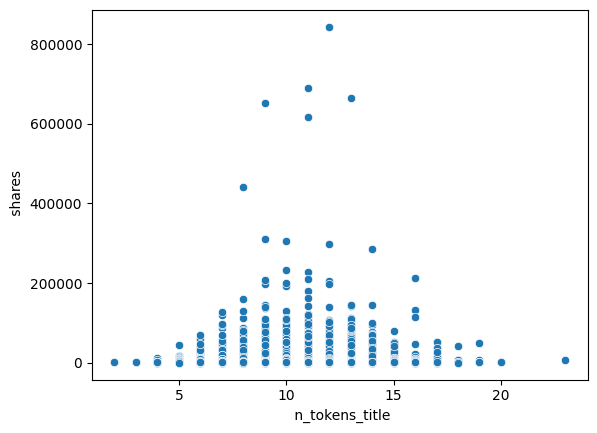

In [7]:
sns.scatterplot(news_df, x=news_df[" n_tokens_title"], y=news_df[" shares"])

We can see in this chart, that articles with roughly 12 words in the title are shared most often. Notice there are values that may be considered outliers.

Let's see if the chart is similar for number of words in the article.

<Axes: xlabel=' n_tokens_content', ylabel=' shares'>

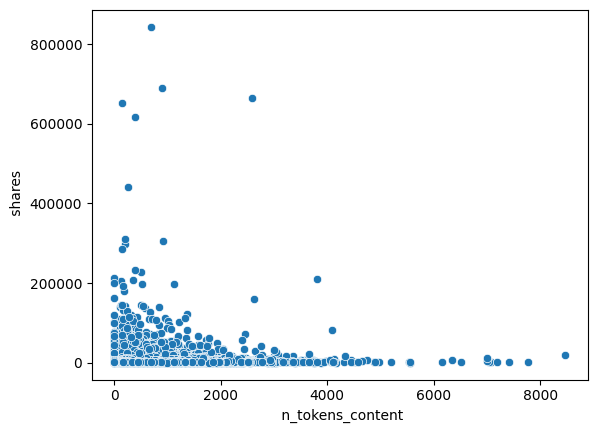

In [8]:
sns.scatterplot(news_df, x=news_df[" n_tokens_content"], y=news_df[" shares"])

Due to the number of shares and the number of words in each article, this scatter plot can be difficult to read as the data is very close together. We can see, however, that articles with the most shares had word counts just under ~1000.  We also can see there may be outliers.

### Summarize data in one sentence

The Online News Popularity data used different features about articles published on Mashable to determine popularity of an article in number of shares.

### Split data into train and test where test size = .3

Now that we have a better understanding of the data, we will import `train_test_split` from `sklearn` to build our train and test sets of data.

In [9]:
from sklearn.model_selection import train_test_split 

From information aquired from the source, we learned that the `shares` column was the target variable thus it will be our 'y' value and everything else will be our 'X'. 

In [10]:
y = news_df[" shares"]
X = news_df.drop(columns = " shares", axis=1)

Once the target variable has been assigned, we can finally split our data.  The instructions ask for a test size of .3, so we will set the `train_size` parameter to `.7`.   We could also set our `test_size` parameter to `.3`.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7)

## Model 1

### Train data in sklearn model on train data

Now that our data has been split, we can create our first model: Random Forest regression.  This model combines multiple decision trees allowing us to get better generalization performance, helping to reduce model variance (Raschka and Mirjalili, 2019).  Basically, from what I understand, Random Forest Regression allows us to reduce spread in data by using decision trees, allowing for more accurate predictions.

In [12]:
from sklearn.ensemble import RandomForestRegressor

In [13]:
forest = RandomForestRegressor(n_estimators=1000,
                              criterion='squared_error',
                              random_state=1,
                              n_jobs=1)

In [14]:
forest.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, n_jobs=1, random_state=1)

In [15]:
forest.score(X_train, y_train)

0.8607012475042771

In [16]:
forest.score(X_test, y_test)

-0.0571387927862852

Random Forest seemed to score very well on the training set, but very poorly on the test set.  Let's visualize residuals to see if we can understand why the score is so low. 

### Analyze residuals

In [17]:
forest_pred = forest.predict(X_train)
forest_pred

array([6976.037, 1815.366, 4585.888, ..., 1768.267, 1269.445, 2920.97 ])

In [18]:
forest_residuals = y_train - forest_pred
forest_residuals

13366   -6114.037
24724     -15.366
20085    -385.888
19274    -452.209
4926     -256.993
           ...   
22513    -602.793
6780     -444.031
29216      31.733
25245     -69.445
30729   -1320.970
Name:  shares, Length: 27750, dtype: float64

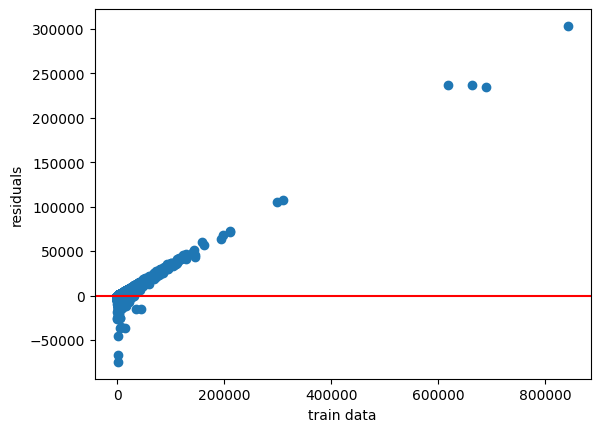

In [19]:
plt.scatter(y_train, forest_residuals)
plt.xlabel("train data")
plt.ylabel("residuals")
plt.axhline(y=0, c="red")

There is not much spread here, and is definetly a linear pattern.  Outliers in the data could be causing some of this, or the features that were used had strong correlation.  Overfitting could also be a factor here.

## Model 2

For the second model, we were tasked to use a model utilizing feature selection.  I used mutual_info_regression as it's goal is to estimate information based on a continuous target variable.  The variable in this data is the number of shares an article has, which is not a qualitative value, so mutual_info_regression should work well (Raschka and Mirjalili, 2019).

In [20]:
from sklearn.feature_selection import mutual_info_regression, SelectKBest
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

### Train on another model with feature selection

In [21]:
# create and fit mutual_info_regression model
feature_selection = SelectKBest(score_func=mutual_info_regression, k=5, )
lm = LinearRegression()
lm_pipeline = make_pipeline(feature_selection, lm)
lm_pipeline.fit(X_train, y_train)

Pipeline(steps=[('selectkbest',
                 SelectKBest(k=5,
                             score_func=<function mutual_info_regression at 0x000001A8D3C58900>)),
                ('linearregression', LinearRegression())])

In [22]:
lm_pipeline.score(X_train, y_train)

0.01583559867309703

In [23]:
lm_pipeline.score(X_test, y_test)

0.015270660979568973

mutual_info_regression did score better on the test set, but worse on the train set.  If there was a way that one would want these number to go, this is it.  However, the values are extremely low for what we were looking to get.  Let's plot residuals to see what is happening.

### Analyze Residuals

In [24]:
y_train_pred = lm_pipeline.predict(X_train)
y_train_pred

array([6517.21006581, 2457.57753149, 4640.52999203, ..., 2875.9757363 ,
       2688.45576365, 3529.08405939])

In [25]:
residuals = y_train - y_train_pred
residuals

13366   -5655.210066
24724    -657.577531
20085    -440.529992
19274   -1354.839263
4926      -73.457609
            ...     
22513    -817.886887
6780    -3184.823058
29216   -1075.975736
25245   -1488.455764
30729   -1929.084059
Name:  shares, Length: 27750, dtype: float64

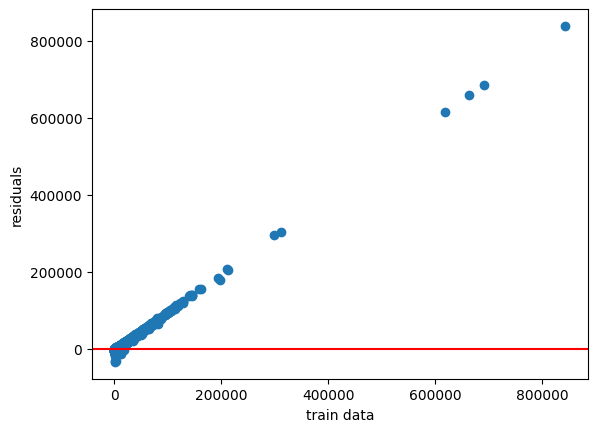

In [26]:
plt.scatter(y_train, residuals)
plt.xlabel("train data")
plt.ylabel("residuals")
plt.axhline(y=0, c="red")

Similar to RandomForest regression, our residuals seem linear and the data seems to be overfit.  We are only using 5 features, instead of all of them, but this still does not seem like a strong model to predict the number of shares an article has.

***

## Reflection

Would you recommend either model that you have considered for real-life prediction based on this data set? If yes, explain why. If no, what other models would you consider?

> Both models scored low and displayed a pattern among residuals so I would not recommend either model to answer the question. According to the source, the Random Forest classifier was used on this data set, as well as a "rolling windows" as an assessment method.  I figured doing a Random Forest regression model would work similar, but something about the model does not work on the test set. Random Forest regression uses decision trees to predict values, but often data cannot be answered in a 'yes/no' form, so a model that does not use that form might work better.  With that logic, I tried again, but this time with a new model, while it scored higher on the test set, was still not great and the residuals mapped a similar pattern.

List three specific things that you have learned or strengthened as a result of doing this project.

> I attempted to use my memory for the majority of the project, looking back at old code to solve problems if they arose, instead of reaching out to sources like StackOverflow and the like.  I learned that I had picked up on a number of topics and was able to apply them without a second thought.  These things were mainly how to clean, split, and build basic models, as well as plot residuals and find predictions.  

> Hyperparameters are important and understanding what each one does is not necessarialy important, but understanding some of them could help to build a better model.

> Models do not have to have a good score to be informative.  From our graphs, although we are using a lot of data, there seems to be some sort of relationship between shares and a number of features in the dataset.  

List three good questions that you can related to your work on this project.

1. What hyperparameters could I change to get models to fit better?

2. What data is the best to predict the number of shares an article has?

3. Why do people share articles?

***

## References

K. Fernandes, P. Vinagre and P. Cortez. A Proactive Intelligent Decision Support System for Predicting the Popularity of Online News. Proceedings of the 17th EPIA 2015 - Portuguese Conference on Artificial Intelligence, September, Coimbra, Portugal.

> I used the website as a source to better understand the variables/features used as well as understand what methods had been used on the data before to gain inspiration for what models I should try.

Raschka, S. and Mirjalili, V., 2019. Python Machine Learning. 3rd ed. Birmingham, UK: Packt.

> I used the course textbook to help define models and gain better understanding of different hyperparameters available. 

***

> I also utilized old course material that we previously worked with to help build a skeleton for the models I would use.